# Lasso vs Ridge Regression:  Numerical Analysis Final Project

In [33]:
using Pkg
using LinearAlgebra
using DataFrames
using CSV
using Statistics

## Import data

In [34]:
matrix_data_temp = CSV.File("median_housing_cost_data.tsv") |> Tables.matrix
matrix_data = matrix_data_temp[:,2:9];

In [35]:
matrix_target_temp = CSV.File("housing_cost_targets.tsv") |> Tables.matrix
matrix_target = matrix_target_temp[:,2];

In [36]:
# train test split (test proportion of 20%) - test has 4128 samples, train has 16512 samples

matrix_data_train = matrix_data[1:16512, :];
matrix_data_test = matrix_data[16513:20640, :];

matrix_target_train = matrix_target[1:16512, :];
matrix_target_test = matrix_target[16513:20640, :];

In [37]:
# normalize data (min max normalize)
#comment this out and run cell above if we wish to do it without normalizing

for i in 1:size(matrix_data_train)[2]
    
    matrix_data_train[:,i] = (matrix_data_train[:,i] .- findmin(matrix_data_train[:,i])[1]) ./ (findmax(matrix_data_train[:,i])[1] - findmin(matrix_data_train[:,i])[1]);
    matrix_data_test[:,i] = (matrix_data_test[:,i] .- findmin(matrix_data_test[:,i])[1]) ./ (findmax(matrix_data_test[:,i])[1] - findmin(matrix_data_test[:,i])[1]);

end

matrix_target_train = (matrix_target_train .- findmin(matrix_target_train)[1]) ./ (findmax(matrix_target_train)[1] - findmin(matrix_target_train)[1]);
matrix_target_test = (matrix_target_test .- findmin(matrix_target_test)[1]) ./ (findmax(matrix_target_test)[1] - findmin(matrix_target_test)[1]);


## Motivating factor

Our motivating factor for our project is to address the lack of accuracy for real estate valuation, and to modernize the real estate sector. Due to the high fees of appraisers and the inconsistent valuations of homes, we would like to streamline the process of determining house value and provide a base asking price for sellers to feel comfortable valuating their homes.

In our project, we implemented two linear regression methodologies (Ridge Regression and Lasso Regression) to create different ways of calculating the price of a home given certain characteristics. These two regressions can be used as machine learning algorithms to provide a great estimate on the cost of a home. Our goal for our algorithms is to determine which is better suited for our data. We will consider our models' accuracy, conditioning, algorithmic complexities, and number of floating point operations.

## Technical Goals

Our ultimate goal from our machine learning models is to "maximize posterior probabilities" of a set of parameters given a sample in order to produce the most likely prediction of the cost of a house in the real world. A "posterior probability" is a calculation of the probability of occurrance in relation to previous observations.

We would like to find the arguments 𝑤 (linear regression parameters) which maximize the posterior probability of our outcomes. This formulation comes from a Bayesian approach called Maximum A Posteriori (MAP) that multiplies the probability of a data likelihood by its prior probability to get the posterior we are attempting to maximize.

We have derived the MAP approaches into linear regression tasks with a closed form solution and a numerical approximation. The distributions of the data likelihoods and prior probabilities dictate the type of regression we will use. From our solutions, we show that data likelihood and prior probabilities both following Gaussian distributions result in ridge regression. We also show that data likelihood following a Gaussian distribution and prior probabilities following a Poisson distribution result in lasso regression.

## Our Data

##### Note: Our dataset is based off of US Census Data and is a dataset which is built into Python's popular SKLearn Library.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

##### Samples: 20,640
##### Dimensionality: 8
#### Features: 
- Median Income
- House Age
- Number of Rooms / House
- Block Group Population
- Number of Bedrooms
- Occupancy
- Latitude
- Longitude
- Median House Price (Target)

## Regression tasks derived from maximizing posterior probabilities

Here we will derive from the Bayesian approach of maximizing w on a posterior probability the corresponding regression task:

For We derive the ridge regression task from the following.
We have an observed data likelihood: $P(t|w) \approx N(t|y, 1)$  
and a prior distribution: $P(w|\lambda) \approx N(w|0,\frac{1}{\lambda})$

We wish to maximize the posterior probability: $P(w|t) = P(t|w) P(w|\lambda)$

$argmax_{w}(P(w|t)) = argmax_{w}(P(t|w) P(w|\lambda))$

$= argmax_{w}(\prod\limits_{i=1}^{N}P(t_i|w)\prod\limits_{j=0}^{M}P(w_j|0,\lambda))$

$= argmax_{w}(\prod\limits_{i=1}^{N}N(t|y_i,1)\prod\limits_{j=0}^{M}N(w_j|0,\frac{1}{\lambda}))$

$\propto argmax_{w}(\sum\limits_{i=1}^{N}ln(N(t_i|y_i,1)) + \sum\limits_{j=0}^{M}ln(N(w_j|0,\lambda)))$

$= argmax_{w}(\sum\limits_{i=1}^{N}ln(e^{\frac{-1}{2}(t_i - y_i)^{T}1(t_i - y_i)}) + \sum\limits_{j=0}^{M}ln(e^{\frac{-1}{2}(w - 0)^{T}\lambda(w - 0)}))$

$= argmin_{w}(-(\frac{-1}{2}\sum\limits_{i=1}^{N}(t_i - y_i)^2 - \frac{\lambda}{2} \sum\limits_{j=0}^{M} w_j^2))$

$= argmin_{w}(\frac{1}{2}\sum\limits_{i=1}^{N}(t_i - y_i)^2 + \frac{\lambda}{2} \sum\limits_{j=0}^{M} w_j^2)$

As we can see, we have successfully derived the ridge (L2) regression formulation

We derive the lasso regression task from the following.
We have an observed data likelihood: $P(t|w) \approx N(t|y, 1)$  
and a prior distribution: $P(w|\lambda) \approx Poisson(w|\frac{1}{\lambda})$

We wish to maximize the posterior probability: $P(w|t) = P(t|w) P(w|\lambda)$

$argmax_w(P(w|t)) = argmax_w(P(t|w) P(w|\lambda))$

$=argmax_w(\prod\limits_{i=1}^{N}N(t_i|y_i,1) \prod\limits_{j=0}^{M}Poisson(w|\frac{1}{\lambda}))$

$\propto argmax_w(\sum\limits_{i=1}^{N}ln(N(t_i|y_i, 1)) + \sum\limits_{j=0}^{M}ln(Poisson(\frac{1}{\lambda})))$

$\propto argmax_w(\sum\limits_{i=1}^{N}ln(e^{\frac{-1}{2}(t_i-y_i)^T1(t_i-y_i)}) + \sum\limits_{j=0}^{M}ln(e^{-w_j\lambda}))$

$=argmin_w(-(\frac{-1}{2}\sum\limits_{i=1}^{N}(t_i-y_i)^2 - \lambda\sum\limits_{j=0}^{M}|w_j| ))$

$=argmin_w(\frac{1}{2}\sum\limits_{i=1}^{N}(t_i-y_i)^2 + \lambda\sum\limits_{j=0}^{M}|w_j| )$

As we can see, we have successfully derived the lasso (L1) regression formulation

## Solutions to regression tasks

Now that we have derived the formulation for ridge regression, let's derive a solution.

$argmin_w(\frac{1}{2}\sum\limits_{i=1}^{N}(t_i-y_i)^2 + \lambda\sum\limits_{j=0}^{M}w_j^2 )$ , inherently implies we should differentiate argument to be minimized with respect to the argument we are trying to find.

If we define: $J(w) = \frac{1}{2}\sum\limits_{i=1}^{N}(t_i-y_i)^2 + \frac{\lambda}{2}\sum\limits_{j=0}^{M}w_j^2$ , then:

$J(w) = \frac{1}{2}(t-Xw)^T(t-Xw) + \frac{\lambda}{2}w^Tw$

$ = \frac{1}{2} (t^Tt - t^TXw - w^TX^Tt + w^TX^TXw) + \frac{\lambda}{2}w^Tw$

We next differentiate $J(w)$ with respect to $w$ : 

$\frac{\partial J(w)}{\partial w} = \frac{1}{2}(0 - 2t^TX + 2w^TX^TX) + \frac{\lambda}{2}2w^TI$

$ = -t^TX + w^TX^TX + \lambda w^TI$

Since, $\frac{\partial J(w)}{\partial w} = 0$, we can thus rearrange terms to get:

$t^TX = w^TX^TX + \lambda w^TI$

$(t^TX)^T = (w^TX^TX)^T + (\lambda w^TI)^T$

$X^Tt = X^TXw + \lambda wI$

$X^Tt = w(X^TX + \lambda I)$

so we thus get as our final solution:  
$w = (X^TX + \lambda I)^{-1}X^Tt$

Now that we have a derived a formulation for lasso regression, let's find a solution. We will quickly realize in attempting to derive it, that there is no simple closed form solution to lasso regression. There exists a complex closed form solution that uses proximity functions, but this is not easy to implement in code. Thus, we will solve a solution to lasso regression numerically with a numerical method, more specifically, gradient descent.

If we define: $J(w) = \frac{1}{2}\sum\limits_{i=1}^{N}(t_i-y_i)^2 + \lambda\sum\limits_{j=0}^{M}|w_j|$ , then:

$J(w) = \frac{1}{2}(t-Xw)^T(t-Xw) + \lambda |w|$

$ = \frac{1}{2} (t^Tt - t^TXw - w^TX^Tt + w^TX^TXw) + \lambda |w| $

Thus we have it that: $\frac{\partial J(w)}{\partial w} = 0$    

and therefore, $-t^TX + w^TX^TX + \alpha \lambda$, such that, $\alpha = sign(w)$

$ => -(X^T(t-Xw + \alpha \lambda))$

From here, we can see that we cannot solve for w easily with a closed form solution. We thus will use this derivative and express it in the form of the gradient of MSE as the update term in gradient descent - a numerical method used to approximate and converge upon the solution.

in gradient descent we have it that: $w^{(t+1)} <= w^{(t)} - \eta \nabla_w MSE(w)$

To express what we have thus far into the gradient of MSE term, all me must do is multiply by 2 and divide by the number of samples since it is "mean" squared error: $\nabla_w MSE(w) = -\frac{2}{m}(X^T(t-Xw + b + \alpha \lambda))$, where b is the bias that comes from the gradient descent, which we define as: $-\frac{2}{m}\sum\limits_{i=1}^{N}(t_i-Xw)$

So in gradient descent we have it that:  
$w^{(t+1)} <= w^{(w)} - \eta (-\frac{2}{m}(X^T(t-Xw + b + \alpha \lambda)))$  
$b^{(t+1)} <= b^{(t)} - \eta (-\frac{2}{m}\sum\limits_{i=1}^{N}(t_i-Xw)) $

These are the update equations we will use to iterate towards the solution for the parameters for lasso regression.

## Code solutions for regression tasks

In [38]:
function linear_regression_ridge(X,y,lambda)
    
    s = size(X)[2]
    Im =1* Matrix(I, s, s)
    
    w = inv(transpose(X)*X + lambda*Im) * transpose(X) * y
    
    pred = X * w
    
    err = y - pred
    
    return w    
    
end

linear_regression_ridge (generic function with 1 method)

In [39]:
function linear_regression_lasso_GD(X, y, lambda)
    
    learning_rate = .025
    iterations = 8000
    l1_penalty = lambda
    n = size(X)[2] # feature number
    m = size(X)[1] #sample number
    w = zeros(n) # shape of the params (feature #)
    b = 0
    
    for i in 1:iterations        
        y_pred = zeros(m)
        for k in 1:m
            y_pred[k] = dot(X[k,:], w) + b
        end
        
        #calculate gradients
        dW = zeros(n) # shape of the params (feature #)
        for j in 1:n
            if w[j] > 0  
                dW[j] = ( -1 * (2 * (dot(X[:,j], y - y_pred) ) ) + l1_penalty) ./ m
            else
                dW[j] = ( -1 * (2 * (dot(X[:,j], y - y_pred) ) ) - l1_penalty) ./ m
            end
        end
        
        db = - 2 * sum(y - y_pred) ./ m
        
        w = w - learning_rate*dW
        b = b - learning_rate*db
        
    end
    
    return w, b
    
end

linear_regression_lasso_GD (generic function with 1 method)

In [40]:
#for performing linear regression on some data X with provided coefficients w
function linear_regression_test(X,w)
    
    pred = X * w
    
    return pred
    
end

linear_regression_test (generic function with 1 method)

In [41]:
#for performing linear regression on some data X with provided coefficients w for gradient descent regression
function linear_regression_test_GD(X,w,b)
    
    m = size(X)[1]
    pred = zeros(m)
    for k in 1:m
        pred[k] = dot(X[k,:], w) + b
    end
    
    return pred
    
end

linear_regression_test_GD (generic function with 1 method)

## Analysis of algorithms: conditioning, complexities, and flop counts

## Conditioning

### Ridge Regression

In [42]:
# This Function checks the conditioning of the Ridge Regression
# by checking each individual operation to see if it is well conditioned.
# If each individual operation of the regression is well conditioned, 
# then the entire algorithm is well conditioned. If a part of the 
# regression is ill conditioned then the algorithm is not optimal.
function ridge_conditioning(X,y,lambda)
    k = zeros(0)                                           # vector containing all condition numbers
    
    s  = size(X)[2]
    push!(k,1)                                                       # s  = size(X)[2]
    
    Im = 1 * Matrix(I, s, s)
    push!(k,1)                                                       # Im = 1 * Matrix(I, s, s)
    
    w = inv(transpose(X)*X + lambda*Im) * transpose(X) * y
    A = transpose(X)*X
    push!(k, norm(transpose(X)*X) * norm(inv(transpose(X)*X)))       # xT * x
    b = lambda*Im
    push!(k, norm(lambda) * norm(inv(lambda)))                       # lambda * I
    C = A + b
    push!(k, norm(A)*norm(inv(A)) + norm(b)*norm(inv(b)))            # A + b
    D = inv(C)
    push!(k, norm(inv(C))*norm(C))                                   # inv(C)
    E = transpose(X) * y
    push!(k, (norm(transpose(X)) * norm(y)) / norm(transpose(X) * y))# xT * y
    F = D * E
    push!(k, (norm(D) * norm(E))/norm(D*E))                          # D * E
    
    pred = X * w
    push!(k, (norm(X) * norm(w))/norm(X*w))                           # X * w
        
    err = y - pred
    push!(k, norm(err))                                              # y - pred
    
    return k
end

ridge_conditioning (generic function with 1 method)

### Lasso Regression

In [43]:
function lasso_gd_conditioning(X, y, lambda)
    learning_rate = .025
    iterations = 8000
    l1_penalty = lambda
    n = size(X)[2] # feature number
    m = size(X)[1] #sample number
    w = zeros(n) # shape of the params (feature #)
    b = 0
    #Above declarations are all well-condtioned since they are assigning values to variables.
    cond = zeros(0); #This var will contain largest condition number from all operations

    for i in 1:iterations
        y_pred = zeros(m); #Well-conditioned since it's assigning zeros to variable
        for k in 1:m
            eq1 = dot(X[k,:], w);
            k1 = (norm(X[k,:]) * norm(w)) / dot(X[k,:], w); #Condition number for dot product is cond f(x) = 1/cos(x,y) = inverse cosine angle between both vectors
            push!(cond,k1)

            eq2 = eq1 + b;
            y_pred[k] = eq2;
            k2 = abs(eq1 / (eq2)); # abs(eq1 / (eq1 + b))
            push!(cond,k2)
        end

        #calculate gradients
        dW = zeros(n) # shape of the params (feature #)
        #Well-condtioned since it's assigning zeros to variable 
        for j in 1:n
            if w[j] > 0
                eq3 = y - y_pred; 
                #conditioning would be determined by the conditioning of of the subtraction of every respective element
                k3 = norm(y - y_pred);
                push!(cond,k3)

                eq4 = dot(X[:,j], eq3);
                k4 = (norm(X[:,j]) * norm(eq3)) / dot(X[:,j], eq3);
                push!(cond,k4)

                eq5 = 2 * eq4; #Condition Number 1 since multiplying by scalar.
                k5 = 1;
                push!(cond,k5)

                eq6 = -1 * eq5;
                #Condition Number 1 since multiplying by scalar.
                k6 = 1;
                push!(cond,k6)

                eq7 = eq6 + l1_penalty;
                k7 = norm(eq7);
                push!(cond,k7)

                eq8 = eq7 ./ m;
                dW[j] = eq8;
                #Condition number is 1 since it is the element division of two variables
                k8 = 1;
                push!(cond,k8)
            else
                eq9 = y - y_pred; 
                #conditioning would be determined by the conditioning of of the subtraction of every respective element
                k9 = norm(y - y_pred);
                push!(cond,k9)

                eq10 = dot(X[:,j], eq9);
                k10 = (norm(X[:,j]) * norm(eq9)) / dot(X[:,j], eq9);
                push!(cond,k10)

                eq11 = 2 * eq10; #Condition Number 1 since multiplying by scalar.
                k11 = 1;
                push!(cond,k11)

                eq12 = -1 * eq11;
                #Condition Number 1 since multiplying by scalar.
                k12 = 1;
                push!(cond,k12)

                eq13 = eq12 - l1_penalty;
                k13 = norm(eq13);
                push!(cond,k13)

                eq14 = eq13 ./ m;
                dW[j] = eq14;
                #Condition number is 1 since it is the element division of two variables
                k14 = 1;
                push!(cond,k14)
            end
                
            eq15 = y - y_pred;
            k15 = norm(y - y_pred);
            push!(cond,k15)

            eq16 = sum(eq15);
            k16 = 1;
            push!(cond,k16)

            eq17 = - 2 * eq16; #Scalar multiplicaiton in well-conditioned
            k17 = 1;
            push!(cond,k17)

            eq18 = eq17 ./ m; # dividing by a scalar m is well-conditioned
            db = eq18;
            k18 = 1;
            push!(cond,k18)

            eq19 = learning_rate*dW; #scalar multiplication is well-conditioned
            k19 = 1;
            push!(cond,k19)

            eq20 = w - eq19;
            w = eq20;
            k20 = norm(w - eq19);
            push!(cond,k20)

            eq21 = learning_rate*db; #scalar multiplication is well-conditioned
            k21 = 1; 
            push!(cond,k21)

            eq22 = b - eq21;
            b = eq22;
            k22 = norm(b - eq21);
            push!(cond,k22)

        end
        
    end
    return cond;
    
end

lasso_gd_conditioning (generic function with 1 method)

## Time complexity

### Ridge Regression

In [20]:
# Ridge Regression Function Decomposed to show computations:
# Parameters- X: (m x n), y: (m x 1), lambda: constant
function ridge_TC(X,y,lambda)
    s  = size(X)[2]                          # O(1)      [CHANGED [1] to [2]... Correct (grab m or n)?]
    Im = 1 * Matrix(I, s, s)                 # O(n^2)    [Constructing (n x n) I Matrix]
    xT = transpose(X)                        # O(1)      [(m x n)] => (n x m)
    xT_X = xT * X                            # O(m^2*n)  [(n x m) * (m x n)] => (n x n)
    l_Im = lambda * Im                       # O(n^2)    [Scalar multiplication of (n x n) matrix]
    xT_lambda = l_Im + xT_X                  # O(n^2)    [Scalar addition of (n x n) matrix]
    inverse = inv(xT_lambda)                 # O(n^3)    [Inverse (Gauss Elimination) with matrix of size (n x n)]
    w = inverse * xT                         # O(n^2*m)  [(n x n) * (n x m)] => (n x m)
    w *= y                                   # O(m*n)    [(n x m) * (m x 1)] => (n x 1)
    pred = X * w                             # O(m*n)    [(m x n) * (n x 1)] => (m x 1)
    err = y - pred                           # O(m)      [(m x 1) - (m x 1)] => (m x 1)
    
    return w, pred, err                      # O(1)
end

ridge_TC (generic function with 1 method)

In [21]:
# Time Complexities Added
# O(n^3) + O(n^2*m) + O(m^2*n) + O(n^2) + O(n^2) + O(n^2) + O(m*n) + O(m*n) + O(m) + O(1) + O(1) + O(1)

# Final Time Complexity: 
# O(n^3) + O(n^2*m) + O(m^2*n)

# Note: If m >> n (Data points >> Features), time complexity can be reduced to O(m^2*n)

In [22]:
# Variable Dimensions
# --------------------------------
# lambda = constant
# (n x n) = xT_X, inverse, Im, l_Im xT_lambda
# (n x m) = xT
# (n x 1) = w
# (m x n) = X
# (m x 1) = y, pred, err

### Lasso Regression

In [24]:
# Parameters - X: (m x n), y: (m x 1), lambda: constant, learning_rate: constant, iterations: constant
# Variables  - m: rows, n: cols, i: iterations

# Note: This is the "expanded" version of our function, allowing each instruction to have its own line.
function lasso_TC(X, y, lambda)
    learning_rate = .025                    # O(1)   [Variable Assignment]
    iterations = 8000                       # O(1)   [Variable Assignment]
    l1_penalty = lambda                     # O(1)   [Variable Assignment]
    n = size(X)[2]                          # O(1)   [Accessing Size Variable]
    m = size(X)[1]                          # O(1)   [Accessing Size Variable]
    w = zeros(n)                            # O(n)   [Creation of vector /w size n]
    b = 0                                   # O(1)   [Variable Assignment]
    
    for i in 1:iterations                   # O(i)   [Loop]
        y_pred = zeros(m)                   # O(m)     [Creation of vector /w size m]
        y_res = y - y_pred                  # O(m)     [Vector Subtraction (m x 1) - (m x 1)]
        
        for k in 1:m                        # O(m)     [Loop]
            dp = dot(X[k,:], w)             # O(n)         [(1 x n).(1 x n)]
            dp += b                         # O(1)         [Scalar Addition]
            y_pred[k] = dp                  # O(1)         [Value Assignment]
        end
        
        # Calculate gradients
        dW = zeros(n)                       # O(n)      [shape of the params (feature #)]
        for j in 1:n                        # O(n)      [Loop]
            dp_XY = dot(X[:,j], y_res)      # O(m)          [Dot Product (m x 1).(m x 1)]
            dp_XY *= -2                     # O(1)          [Scalar Multiplication]
            
            if w[j] > 0                     # O(1)          [Accessing index] [IF/ELSE: Calculations / Iteration = 2*O(1)]
                XY_pen = dp_XY + l1_penalty # O(1)          [Scalar Addition]
                dW[j] = XY_pen / m          # O(1)          [Scalar Division]
            else
                XY_pen = dp_XY - l1_penalty # O(1)          [Scalar Subtraction]
                dW[j] = XY_pen / m          # O(1)          [Scalar Subtraction]
            end
        end
        
        db = sum(y_res)                     # O(m)      [Summation of (m x 1)]
        db *= -2                            # O(1)      [Scalar Multiplication]
        db /= m                             # O(1)      [Scalar Division]
        
        lrdW = learning_rate*dW             # O(1)      [Scalar Multiplication]
        w -= lrdW                           # O(1)      [Scalar Subtraction]
        
        lrdb = learning_rate*db             # O(1)      [Scalar Multiplication]
        b -= lrdb                           # O(1)      [Scalar Subtraction]
        
    end
    
    return w, b                             # O(1)   [Return Values]
    
end

lasso_TC (generic function with 1 method)

In [24]:
# Variable Dimensions
# ---------------------
# Constant: learning_rate, iterations, l1_penalty, n, m, b, db, lrdW, lrdb, lambda
# (n x 1) : w, dW
# (m x 1) : y_pred, y_res, y
# (m x n) : X

In [25]:
# Total Time Complexity
# (6*O(1) + O(n)) + i*(O(m) + O(m) + m(O(n) + O(1) + O(1)) + O(n) + n(O(m) + O(1) + O(1) + O(1) + O(1)) + O(m) + 7*O(1))
# (6*O(1) + O(n)) + i*(5*O(m) + 2*O(m*n) + 5*O(n) + 7*O(1))
# (2*O(m*n*i) + 5*O(m*i) + 5*O(n*i) + 7*O(i)) + (6*O(1) + O(n))
# O(m*n*i) + O(m*i) + O(n*i) + O(i) + O(n) + O(1) 

# Final Time Complexity
# O(m*n*i)

In [25]:
# Time Complexity References
# ----------------------------------------
# Size(X)       : O(1)
# References    : [https://stackoverflow.com/questions/21614298/what-is-the-runtime-of-array-length, https://blog.finxter.com/python-list-length-whats-the-runtime-complexity-of-len/, ]

# Transpose(X)  : O(1)    
# References    : [https://www.mathworks.com/matlabcentral/answers/495668-what-s-the-transpose-complexity-big-o-in-matlab, https://stackoverflow.com/questions/61157101/in-julia-transpose-operator]

# Inverse(X)    : Worst Case-O(n^3) (Gauss Elimination), Best Case O(n^2.373)
# References    : [https://stackoverflow.com/questions/54890422/inv-versus-on-julia]

# Matrix *      : (m x n) * (n * p) => O(n*m*p), O(n^3)-O(n^2.72...)
# References    : [https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra]

# Matrix -      : O(m*n)
# References    : [https://www.geeksforgeeks.org/different-operation-matrices/]

# Matrix(I,s,s) : O(n^2)
# References    : [https://stackoverflow.com/questions/282926/time-complexity-of-memory-allocation]

# Zeros(n)      : O(n)
# References    : [https://discourse.julialang.org/t/faster-zeros-with-calloc/69860/13, https://stackoverflow.com/questions/5640850/java-whats-the-big-o-time-of-declaring-an-array-of-size-n]

# Dot(n, n)     : O(n)
# References    : [https://helloacm.com/teaching-kids-programming-compute-the-dot]

## Space Complexity

### Ridge Regression

In [27]:
# Actual Ridge Algorithm
function ridge_SC(X,y,lambda)                               # X: (m x n), Y: (m x 1), lambda: (constant)
    n = size(X)[2]                                          # O(1)    1 variable
    Im = 1 * Matrix(I, n, n)                                # O(n^2)  (n x n) matrix
    w = inv(transpose(X)*X + lambda*Im) * transpose(X) * y  # O(n)    (n x 1) matrix
                                                            # O(n^2)  (n x n) matrices [3 temporary matrices]
                                                            # O(m*n)  (n x m) matrix   [1 temporary matrix]
    pred = X * w                                            # O(m)    (m x 1) matrix
    err = y - pred                                          # O(m)    (m x 1) matrix
    
    return w, pred, err                                     # O(1)    Return on Stack
end

ridge_SC (generic function with 1 method)

In [27]:
# Total Space Complexity
# O(n^2) + O(n^2) + O(n^2) + O(n^2) + O(n*m) + O(n) + O(m) + O(m) + O(1) + O(1)

# Final Space Complexity
# O(n^2) + O(n*m)

### Lasso Regression

In [26]:
# Parameters - X: (m x n), y: (m x 1), lambda: constant, learning_rate: constant, iterations: constant
# Variables  - m: rows, n: cols, i: iterations
function lasso_SC(X, y, lambda)
    learning_rate = .025                    # O(1)   [Variable Assignment]
    iterations = 8000                       # O(1)   [Variable Assignment]
    l1_penalty = lambda                     # O(1)   [Variable Assignment]
    n = size(X)[2]                          # O(1)   [Accessing Size Variable]
    m = size(X)[1]                          # O(1)   [Accessing Size Variable]
    w = zeros(n)                            # O(n)   [Creation of vector /w size n]
    b = 0                                   # O(1)   [Variable Assignment]
    
    for i in 1:iterations                   # O(i)   [Loop]
        y_pred = zeros(m)                   # O(m)       [Creation of vector of size m]
        y_res = y - y_pred                  # O(m)       [Creation of vector of size m]
        
        for k in 1:m                        # O(m)       [Loop]
            y_pred[k] = dot(X[k,:], w) + b  # O(1)           [Storing Value]
                                            # O(m)           [+ Temporary Dot Product Vector]
                                            # O(1)           [+ Temporary Scalar Value]
        end
        
        #calculate gradients
        dW = zeros(n)                       # O(n)       [Creation of vector /w size n]
        for j in 1:n                        # O(n)       [Loop]
            dp_XY = -2 * dot(X[:,j], y_res) # O(m)          [Creation of vector size m]
                                            # O(1)          [+ Temporary Scalar Value]
            if w[j] > 0                     # ----          [Access Index] [IF/ELSE: Space / Iteration = 2*O(1)]
                dW[j] = (dp_XY + l1_penalty) ./ m  # O(1)   [Variable Assignment]
                                                   # O(1)   [+ Temporary Scalar Value]
            else
                dW[j] = (dp_XY - l1_penalty) ./ m  # O(1)   [Variable Assignment]
                                                   # O(1)   [+ Temporary Scalar Value]
            end
        end
        
        db = - 2 * sum(y - y_pred) ./ m            # O(1)   [Variable Assignment]
                                                   # O(1)   [+ Temporary Scalar Value] x2
        
        w = w - learning_rate*dW                   # O(1)   [Variable Assignment]
                                                   # O(1)   [+ Temporary Scalar Value]
        
        b = b - learning_rate*db                   # O(1)   [Variable Assignment]
                                                   # O(1)   [+ Temporary Scalar Value]
    end
    
    return w, b                                    # O(n)   [Returning (n x 1)]
                                                   # O(1)   [+ Returning scalar]
    
end

lasso_SC (generic function with 1 method)

In [29]:
# Total Space Complexity
# Variables: m: rows, n: columns, i: iterations

# (6*O(1) + O(n)) + i*(O(m) + O(m) + m*(O(1) + O(m) + O(1)) + O(n) + n*(O(m) + 3*O(1)) + O(n) + 7*O(1))
# (6*O(1) + O(n)) + i*(O(m^2) + O(m*n) + 5*O(n) + 4*O(m) + 7*O(1))
# (6*O(1) + O(n)) + i*(O(m^2) + O(m*n) + 5*O(n) + 4*O(m) + 7*O(1))
# O(m^2*i) + O(m*n*i) + 5*O(n*i) + 4*O(m*i) + 7*O(i) + O(n) + 6*O(1)
# O(m^2*i) + O(m*n*i) + O(n*i) + O(m*i) + O(i) + O(n) + O(1)

# Final Space Complexity 
# O(m^2*i) + O(m*n*i)

In [30]:
# Space Complexity References
# -------------------------------
# [Space Complexity Calculates Temp Vars?] https://www.studytonight.com/data-structures/space-complexity-of-algorithms

## Flop Counts

### Ridge Regression

In [31]:
# Ridge Regression Function Decomposed:
# Parameters- X: (m x n), y: (m x 1), lambda: constant
function ridge_FC(X,y,lambda)
    n  = size(X)[2]                          # 0
    Im = 1 * Matrix(I, n, n)                 # n^2          [Constructing (n x n) I Matrix]
    xT = transpose(X)                        # 0            [(m x n)] => (n x m)
    xT_X = xT * X                            # m^2*n        [(n x m) * (m x n)] => (n x n)
    l_Im = lambda * Im                       # n^2          [Scalar multiplication of (n x n) matrix]
    xT_lambda = l_Im + xT_X                  # n^2          [Scalar addition of (n x n) matrix]
    inverse = inv(xT_lambda)                 # n^3 (approx) [Gauss Elimination with matrix of size (n x n)]
    w = inverse * xT                         # n^2*m        [(n x n) * (n x m)] => (n x m)
    w *= y                                   # m*n          [(n x m) * (m x 1)] => (n x 1)
    pred = X * w                             # m*n          [(m x n) * (n x 1)] => (m x 1)
    err = y - pred                           # m            [(m x 1) - (m x 1)] => (m x 1)
    
    return w, pred, err                      # 0
end

ridge_FC (generic function with 1 method)

In [32]:
# Flop Count
# n^2 + (m^2*n) + n^2 + n^2 + n^3 + n^2*m + m*n + m*n + m
# Total Flop Count = n^3 + (3+m)n^2 + n*m^2 + 2m*n + m

# Note: In the worst case, Gaussian Elimination for n x n will take ((5/6)n^3+(3/2)n^2-(7/6)n) floating point operations.
# Worst Case Flops = (5/6)n^3 + ((9/2)+m)n^2 + n*m^2 + ((5/6)m)n + m

### Lasso Regression

In [28]:
# Lasso Regression Function Decomposed:
# Parameters - X: (m x n), y: (m x 1), lambda: constant, learning_rate: constant, iterations: constant
# Variables  - m: rows, n: cols, i: iterations

# Note: This is the "expanded" version of our function, allowing each instruction to have its own line.
function linear_regression_lasso_GD(X, y, lambda)
    learning_rate = .025                    # 0
    iterations = 8000                       # 0
    l1_penalty = lambda                     # 0
    n = size(X)[2]                          # 0
    m = size(X)[1]                          # 0
    w = zeros(n)                            # 0
    b = 0                                   # 0
    
    for i in 1:iterations                   # i*   [Loop]
        y_pred = zeros(m)                   # 0
        y_res = y - y_pred                  # m         [Vector Subtraction (m x 1) - (m x 1)]
        
        for k in 1:m                        # m*        [Loop]
            dp = dot(X[k,:], w)             # n            [(1 x n).(1 x n)]
            dp += b                         # 1            [Scalar Addition]
            y_pred[k] = dp                  # 0
        end
        
        # Calculate gradients
        dW = zeros(n)                       # 0
        for j in 1:n                        # n*        [Loop]
            dp_XY = dot(X[:,j], y_res)      # m             [Dot Product (m x 1).(m x 1)]
            dp_XY *= -2                     # 1
            
            if w[j] > 0                     # -             [IF/ELSE: Flops / Iteration = 2]            
                XY_pen = dp_XY + l1_penalty # 1                 [Scalar Addition]
                dW[j] = XY_pen / m          # 1                 [Scalar Division]
            else
                XY_pen = dp_XY - l1_penalty # 1                 [Scalar Subtraction]
                dW[j] = XY_pen / m          # 1                 [Scalar Subtraction]
            end
        end
        
        db = sum(y_res)                     # m         [Summation of (m x 1)]
        db *= -2                            # 1         [Scalar Multiplication]
        db /= m                             # 1         [Scalar Division]
        
        lrdW = learning_rate*dW             # 1         [Scalar Multiplication]
        w -= lrdW                           # 1         [Scalar Subtraction]
        
        lrdb = learning_rate*db             # 1         [Scalar Multiplication]
        b -= lrdb                           # 1         [Scalar Subtraction]
        
    end
    
    return w, b                             # O(1)   [Return Values]
    
end

linear_regression_lasso_GD (generic function with 1 method)

In [34]:
# Flop Count:
# Variables: m: rows, n: columns, i: iterations
# i * (m + m*(n + 1) + n*(m + 1 + 1 + 1) + m + 1 + 1 + 1 + 1 + 1)

# Total Flops = i * (2mn + 3m + 3n + 6)

In [35]:
# Flop Count References:
# Flops For nxn Gaussian Elimination: http://web.mit.edu/18.06/www/Fall15/Matrices.pdf

## Perform regression tasks on data

In [19]:
function r_squared(targets, predictions)
    
    mean_target = mean(targets)
    
    ssr = 0
    sst = 0
    
    for i in 1:size(targets)[1]
        
        ssr += (targets[i] - predictions[i])^2
        sst += (targets[i] - mean_target)^2
        
    end
    
    r_sq = 1 - (ssr/sst)
    
end

r_squared (generic function with 1 method)

In [44]:
lambdas = [.000001, .00001, .0001, .001, .01, .05, .1, .5, 1.5, 5, 10, 12, 15, 18, 20];

In [50]:
optimal_l1_params = zeros(8)
optimal_l2_params = zeros(8)

optimal_l1_r_sq = -1
optimal_l2_r_sq = -1

optimal_l1_lam = -1000
optimal_l2_lam = -1000

for it in lambdas
    
    parameters_l2 = linear_regression_ridge(matrix_data_train,matrix_target_train, it);
    parameters_l1, b_l1 = linear_regression_lasso_GD(matrix_data_train,matrix_target_train, it);
    
    predictions_l2 = linear_regression_test(matrix_data_test, parameters_l2);
    predictions_l1 = linear_regression_test_GD(matrix_data_test, parameters_l1, b_l1);
    predictions_l1 = reshape(predictions_l1, length(predictions_l1), 1);
    
    r_sq_l2 = r_squared(sort(matrix_target_test, dims=1), sort(predictions_l2, dims=1));
    r_sq_l1 = r_squared(sort(matrix_target_test, dims=1), sort(predictions_l1, dims=1));
    
    if r_sq_l2 > optimal_l2_r_sq
        optimal_l2_r_sq = r_sq_l2
        optimal_l2_params = parameters_l2
        optimal_l2_lam = it
    end
    
    if r_sq_l1 > optimal_l1_r_sq
        optimal_l1_r_sq = r_sq_l1
        optimal_l1_params = parameters_l1
        optimal_l1_lam = it
    end
    
    
end

In [51]:
println("The optimal lambda coefficient for l1 norm is:", optimal_l1_lam)
println("The optimal lambda coefficient for l2 norm is:", optimal_l2_lam)
println("The optimal r^2 value for l1 norm is:", optimal_l1_r_sq)
println("The optimal r^2 value for l2 norm is:", optimal_l2_r_sq)

The optimal lambda coefficient for l1 norm is:1.0e-6
The optimal lambda coefficient for l2 norm is:5.0
The optimal r^2 value for l1 norm is:0.9046659108542182
The optimal r^2 value for l2 norm is:0.8722628864709415


## Evaluation of algorithm performance

QQ-Plots and R squared values for optimal lambdas

In [81]:
# hard code in the optimal regularization coefficients to function
parameters_l2 = linear_regression_ridge(matrix_data_train,matrix_target_train, 5);
parameters_l1, b_l1 = linear_regression_lasso_GD(matrix_data_train,matrix_target_train, .00001);
    
predictions_l2 = linear_regression_test(matrix_data_test, parameters_l2);
predictions_l1 = linear_regression_test_GD(matrix_data_test, parameters_l1, b_l1);
predictions_l1 = reshape(predictions_l1, length(predictions_l1), 1);
    
sorted_test_targets = sort(matrix_target_test, dims=1)
sorted_l2_preds = sort(predictions_l2, dims=1)
sorted_l1_preds = sort(predictions_l1, dims=1)
r_sq_l2 = r_squared(sorted_test_targets, sorted_l2_preds);
r_sq_l1 = r_squared(sorted_test_targets, sorted_l1_preds);

In [90]:
using FileIO
using Images

Flat line exists at 1 along the y-axis because our input target values are min-max normalized, meaning the values cannot exceed 1. However, our prediction values can exceed 1 because they are not restrained and follow a regression line. This explains the unusual shape of the qq-plot.

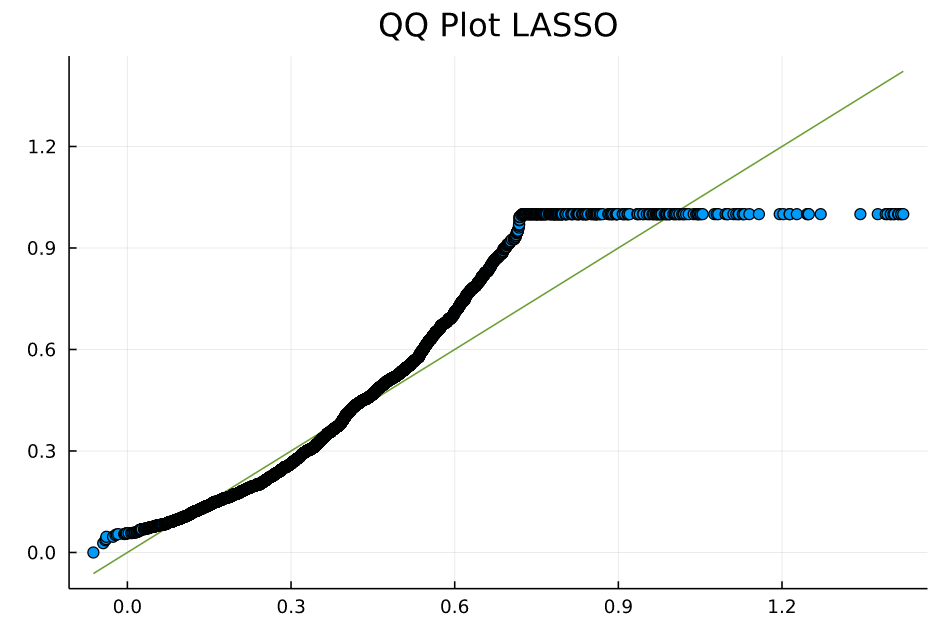

In [92]:
img1 = load("qqplot_lasso.png")

In [95]:
print("The optimal R squared value for Lasso regression is:", r_sq_l1)

The optimal R squared value for Lasso regression is:0.9046658818867916

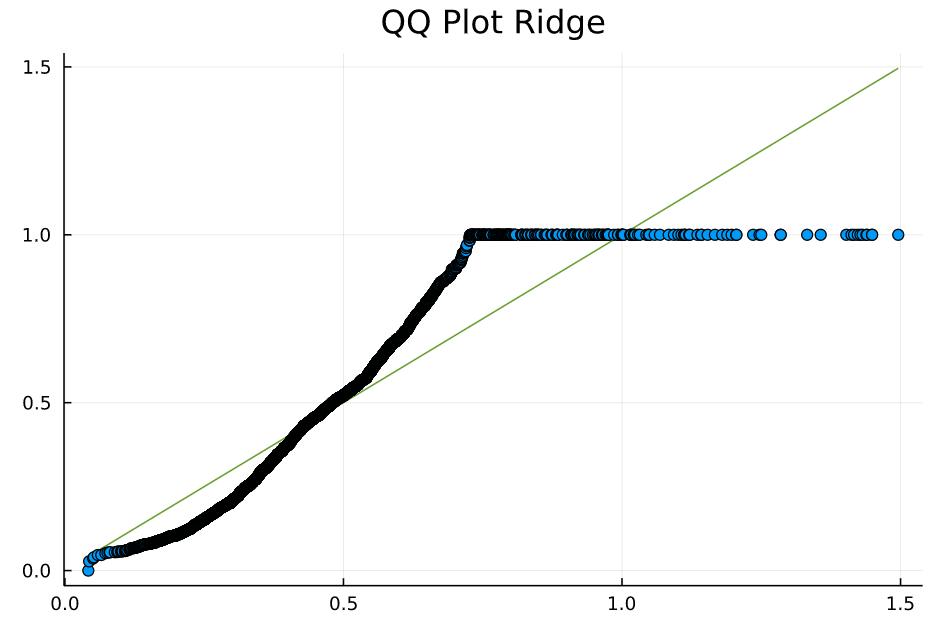

In [94]:
img2 = load("qqplot_ridge.png")

In [96]:
print("The optimal R squared value for Ridge regression is:", r_sq_l2)

The optimal R squared value for Ridge regression is:0.8722628864709415

In [55]:
#calculating conditioning of our algorithms using the optimal lambda values
k_ridge = ridge_conditioning(matrix_data_train,matrix_target_train,5);
k_lasso = lasso_gd_conditioning(matrix_data_train,matrix_target_train,.00001);

In [56]:
k_ridge'

1×10 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  1.0  42455.3  1.0  42463.3  3258.34  1.26766  977.901  3.34407  20.9835

In [57]:
k_lasso'

1×265088000 adjoint(::Vector{Float64}) with eltype Float64:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  1.0  1.0  1.50948  1.0  0.530371

In [80]:
print("Conditioning values for operations in ridge regression\n")
for i in k_ridge
    
   println(i)
    
end

println("\nThus we can see ridge regression has no ill conditioned steps and is a stable algorithm.")

Conditioning values for operations in ridge regression
1.0
1.0
42455.25525287322
1.0
42463.25525287322
3258.342319248199
1.2676551061091732
977.9007528176628
3.344068051515611
20.9834573440929

Thus we can see ridge regression has no ill conditioned steps and is a stable algorithm.


In [77]:
print("Conditioning values for operations in lasso regression\n")
nanCount = count(i->(isnan(i)), k_lasso)
nonnanCount = length(k_lasso) - nanCount
println("The number of ill conditioned steps in our gradient descent implementation of lasso is: ", nanCount)
println("The number of well conditioned steps in our gradient descent implementation of lasso is: ", nonnanCount)
println("So it is more indicative to look at the proportion of ill conditioned steps: ", nanCount / length(k_lasso))
println("However, this implementation of lasso regression is still ill conditioned since it contains ill conditioned steps")

Conditioning values for operations in lasso regression
The number of ill conditioned steps in our gradient descent implementation of lasso is: 33024
The number of well conditioned steps in our gradient descent implementation of lasso is: 265054976
So it is more indicative to look at the proportion of ill conditioned steps: 0.00012457749879285368
However, this implementation of lasso regression is still ill conditioned since it contains ill conditioned steps


## Conclusion

|   | Time Complexity | Space Complexity | Flop Count| Conditioning |
| :----------- | :----------- | :----------- | :----------- |:----------- |
| Ridge  |$ O(n^3) + O(m^2n) + O(n^2m) $ | $O(n^2) +O(nm)$ | $\frac{5}{6}n^3 + (\frac{9}{2}+m)n^2 + nm^2 + (\frac{5}{6}m)n + m$     | Well Conditioned |
| Lasso  |$ O(mni)$ |$  O(m^2i) + O(mni)     $|  $i(2mn + 3m + 3n + 6)$   |Ill Conditioned|
| Preferred Algorithm |  Lasso (Unless i > m > n)   |  Ridge (When m > n)   | Lasso (Unless: i > m > n) | |

Our results show that Lasso Regression is the better algorithm when it comes to Time Complexity when the number of iterations of the lasso regression (i) is less than the number of rows (m) and columns (n) from the input data. This is because the term of $O(nm^2)$ in the Ridge regression will be its largest term when m > n (normal case), which would be greater than $O(mn*i)$. However, in cases where "i" is large, ridge regression will outperform lasso in time complexity.

When it comes to Space Complexity, Ridge regression uses less memory when the number of data points in the input matrix (m) is greater than the number of features. This should occur for most cases.

In addition, Lasso and Ridge appear to be similar when it comes to floating point operations. If the number of rows is a larger value than n or i, Lasso will easily calculate less FLOPS due to not needing to use Gaussian Elimination to find the inverse of a large matrix. However, if the number of iterations (i) is larger than the number of rows (m), and the number of rows is greater than the number of features (n), the ridge regression will perform fewer floating point operations.

Complexity Results:

Lasso regression beats ridge regression in time complexity and the number of floating point operations it computes when its number of iterations (i) is lower than the number of data entries (m). Otherwise, Ridge regression wins on Time, Space, and Number of Flops.

Also, in all cases except where the number of data features is greater than data entries (not common), ridge regression will use significantly less space than lasso regression.

Thus we have shown in this presentation the differences in our algorithms that we could potentially use in estimating the values of homes. We see that there exist both pro's and con's for both ridge and lasso regression. These techniques are implementations of the Bayesian approach of maximizing a posterior probability. So, one of the deciding factors of the choice of the algorithm we should implement in estimating home prices should be determined by the prior distributions of home values. This prior distribution could change depending on factors outside of what we tested for (outside of California). We show that the prior distribution in California follows more closely to a poisson distribution over a Gaussian since the performance of Lasso was slightly better than that of Ridge. Therefore for California price housing estimation, we would choose Lasso over ridge since the differences in algorithmic performance show higher accuracy for lasso, and better time complexity and flop counts under most circumstances. Although, with this choice, we must keep in mind that the gradient descent implementation of Lasso regression is an ill-conditioned algorithm. This implies we must be careful with the data in which we pass, further implying we should always normalize or standardize the input data that way we avoid the exploding gradient problem.